In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tools
import schottky as sch
import fitutils as ft

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature

squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature

In [34]:
# Constantes et tableaux

k = 1.380649e-23
delta = 2.9461005*k*2.4
temp = np.arange(0, 10, 1e-3)
r = 831446261815324  # J/mol.K

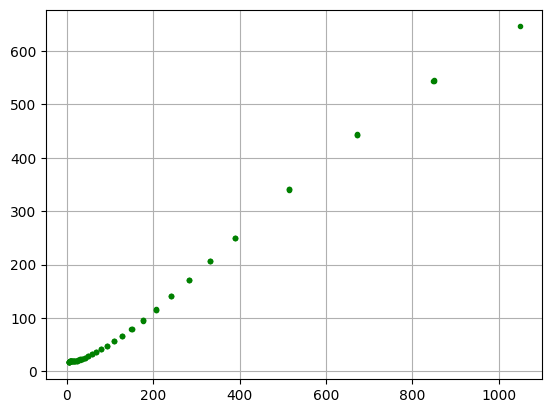

In [40]:
plt.figure()
plt.plot(squared_temperature[0:100], C_div_T[0:100], ".g")
plt.grid(True)
plt.show()

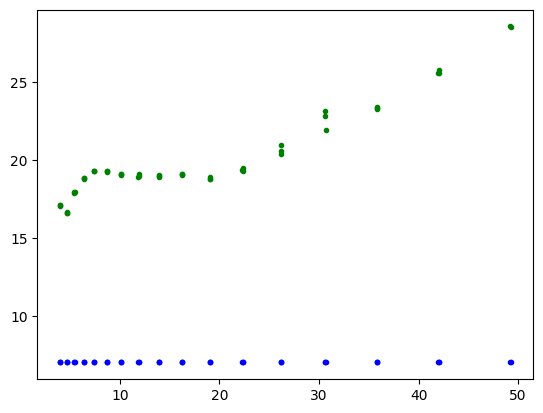

In [38]:
E = 2.4*k*np.sqrt(sch.max_schottky(squared_temperature, C_div_T, 0, 16)[0])

plt.figure()
plt.plot(squared_temperature[0:50], C_div_T[0:50], ".g")        
plt.plot(squared_temperature[0:50], sch.schottky(temperature[0:50]/temperature[0:50], E, n=2e-2), ".b")

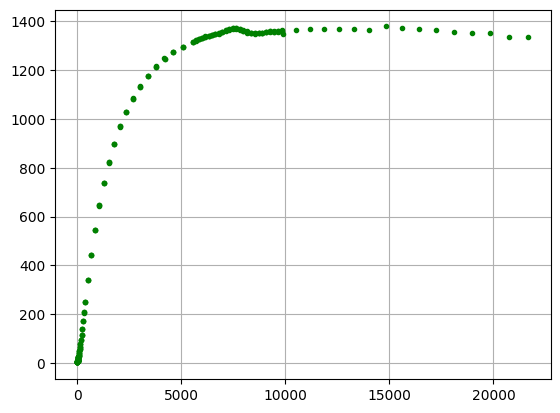

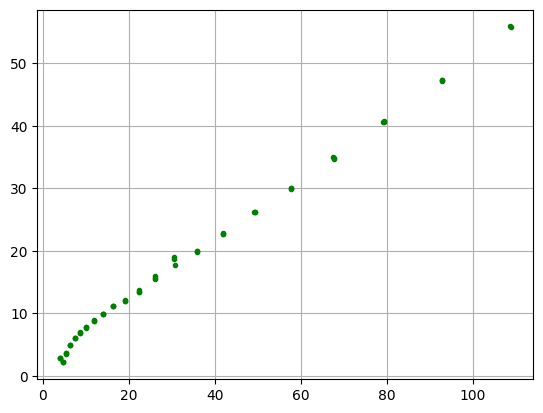

In [47]:
# Soustraction de HC par schottky

HC_sample_substracted = sample_HC - sch.schottky(temperature, E, n=1e-2) #en mJ/mol.K
C_substracted_divT = HC_sample_substracted / temperature

plt.figure()
plt.plot(squared_temperature, C_substracted_divT, ".g")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(squared_temperature[0:65], C_substracted_divT[0:65], ".g")
plt.grid(True)
plt.show()


7248683.251892604


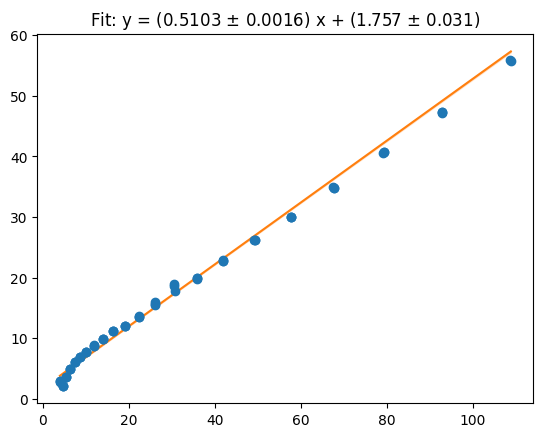

In [53]:
# Linear fit

ajustement = ft.linfitxy(squared_temperature[0:65], C_substracted_divT[0:65], 2*err_temperature[0:65]*temperature[0:65], err_C_divT[0:65], 
                         plot=True)

beta = ajustement[0]*1e-3 # en mJ

temp_debye_cube = (12*r*(np.pi**4))/(5*beta)
temp_debye = temp_debye_cube**(1/3)  

print(temp_debye)

In [52]:
10/2.5

4.0